<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-computational-approach-to-understanding-the-bootstrap" data-toc-modified-id="A-computational-approach-to-understanding-the-bootstrap-1">A computational approach to understanding the bootstrap</a></span></li><li><span><a href="#Intuition-behind-the-bootstrap-for-continuous-data" data-toc-modified-id="Intuition-behind-the-bootstrap-for-continuous-data-2">Intuition behind the bootstrap for continuous data</a></span><ul class="toc-item"><li><span><a href="#The-population-and-the-sample" data-toc-modified-id="The-population-and-the-sample-2.1">The population and the sample</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-2.1.1">Examples</a></span></li><li><span><a href="#Gain-intuition-using-the-interactive-simulator" data-toc-modified-id="Gain-intuition-using-the-interactive-simulator-2.1.2">Gain intuition using the interactive simulator</a></span></li></ul></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-2.2">Central Limit Theorem</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-2.2.1">Examples</a></span></li><li><span><a href="#Scenario-1---Many-samples,-each-one-quite-small" data-toc-modified-id="Scenario-1---Many-samples,-each-one-quite-small-2.2.2">Scenario 1 - Many samples, each one quite small</a></span></li><li><span><a href="#Scenario-2---Few-samples,-each-one-quite-large" data-toc-modified-id="Scenario-2---Few-samples,-each-one-quite-large-2.2.3">Scenario 2 - Few samples, each one quite large</a></span></li><li><span><a href="#Gain-intuition-using-the-interactive-simulator" data-toc-modified-id="Gain-intuition-using-the-interactive-simulator-2.2.4">Gain intuition using the interactive simulator</a></span></li></ul></li><li><span><a href="#The-bootstrap-in-a-nutshell" data-toc-modified-id="The-bootstrap-in-a-nutshell-2.3">The bootstrap in a nutshell</a></span></li><li><span><a href="#How-to-run-a-basic-bootstrap-and-calculate-confidence-interval" data-toc-modified-id="How-to-run-a-basic-bootstrap-and-calculate-confidence-interval-2.4">How to run a basic bootstrap and calculate confidence interval</a></span><ul class="toc-item"><li><span><a href="#How-does-resampling-with-replacement-work?" data-toc-modified-id="How-does-resampling-with-replacement-work?-2.4.1">How does resampling with replacement work?</a></span></li><li><span><a href="#The-bootstrap-at-work" data-toc-modified-id="The-bootstrap-at-work-2.4.2">The bootstrap at work</a></span></li><li><span><a href="#Why-the-bootstrap-works" data-toc-modified-id="Why-the-bootstrap-works-2.4.3">Why the bootstrap works</a></span></li><li><span><a href="#Putting-it-all-together" data-toc-modified-id="Putting-it-all-together-2.4.4">Putting it all together</a></span></li><li><span><a href="#Gain-intuition-using-the-interactive-simulator" data-toc-modified-id="Gain-intuition-using-the-interactive-simulator-2.4.5">Gain intuition using the interactive simulator</a></span></li><li><span><a href="#Bootstrap-accuracy" data-toc-modified-id="Bootstrap-accuracy-2.4.6">Bootstrap accuracy</a></span></li></ul></li></ul></li><li><span><a href="#Intuition-behind-the-bootstrap-for-proportions" data-toc-modified-id="Intuition-behind-the-bootstrap-for-proportions-3">Intuition behind the bootstrap for proportions</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import faker
from faker import utils
import ipywidgets
import seabornextends as snsexts
from seabornextends import plots, retouch
from seabornextends.retouch import grid, ax, fig

In [3]:
sns.set_style('whitegrid')
mpl.rcParams['grid.color'] = '0.95'
mpl.rcParams['grid.alpha'] = 0.8
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.family'] = 'Roboto Condensed'

# A computational approach to understanding the bootstrap

This notebook is an interactive tutorial into the [bootstrap](https://www.google.co.uk/search?q=bootstrap+statistics), a powerful resampling method used widely in statistics, data science and machine learning. 

I have always struggled with statistics, maths and formulas until I came across the **computational approach to statistics**. In computational statistics we use our computer to run many, many simulations to gain intuition into statistical concepts and convince ourselves that the classical formulas really do work (without ever having to remember them!). 

But computational statistics is not just for gaining statistical intuition. It can often (but not always) completely replace classical statistical techniques.

# Intuition behind the bootstrap for continuous data

## The population and the sample

All data is generated by some underlying process (we just usually don't know what that is). 

Let's assume we had an **infinite number of customers and we plotted a distribution of their order values** (or some other unit economics like margin or profit):

In [4]:
POP_SIZE = 20000000

# Define the parameters of the process/function that generates
# our data
POP_SHAPE_KWS = dict(loc=30, scale=10)
POP_DIST_NAME = 'expon'

# Create some function that describes the underlying process.
# For convenience we use the exponential distribution from scipy
# as this produces a distribution of order values that's fairly 
# realistic and common in ecommerce (i.e. most order values are 
# around 40 but there's a long tail of higher order values)
population_fn = stats.expon(**POP_SHAPE_KWS)

# Generate 20 million order values using this function. We can
# look at these values and say that they ARE our population.
population = population_fn.rvs(size=POP_SIZE)

# Calculate the mean order value of the population (population AOV).
# This is our *true* population mean
population_mean = np.mean(population)

Plot the distribution of our 20 million order values (our historical transactions). This is the distribution of our _population_. We say this because the size of this dataset is so large that for all intents and purposes it IS our population.

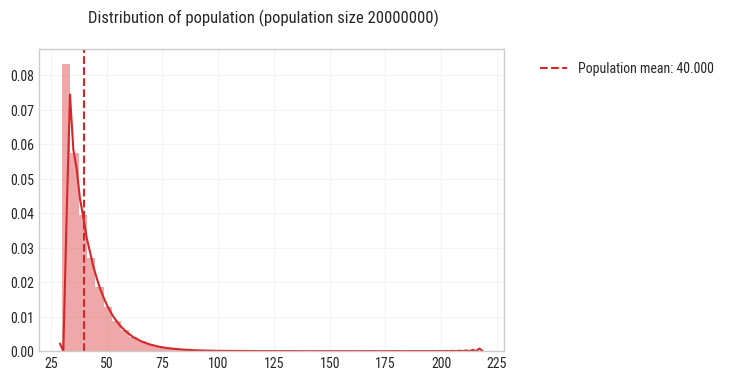

In [5]:
ax = sns.distplot(a=population, color='C3')
ax.axvline(x=population_mean, color='C3', label='Population mean: {:.3f}'.format(population_mean), ls='dashed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().suptitle(t="Distribution of population (population size {0})".format(POP_SIZE, y=1.01))

### Examples

If we **generate a random sample of 30 orders** using the _same_ function that generated our historical transactions (which form our population), this is what their revenue distribution would look like.

**NOTE:** Every time we run this cell we get a different random sample of 30 orders.

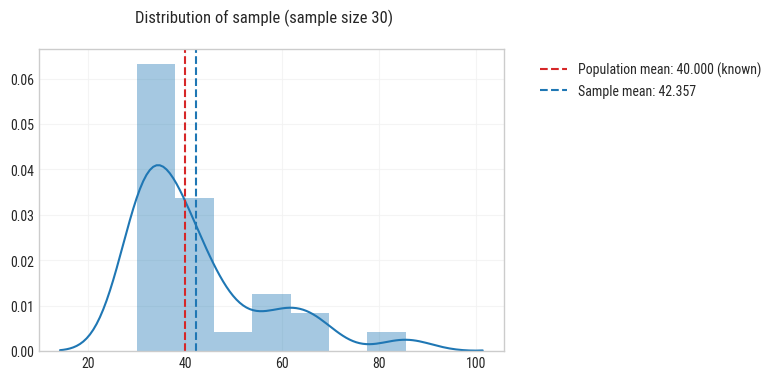

In [6]:
sample_size = 30

# We use our `population_fn` function to generate this sample.
# We therefore *know* that our sample of 30 orders comes from 
# our population defined above because it is generated using 
# the _same_ function.
sample = population_fn.rvs(sample_size)
sample_mean = np.mean(sample)

# plot the distribution of our sample
ax = sns.distplot(a=sample, color='C0')

# draw a line for the population mean
ax.axvline(x=population_mean,
           color='C3',
           ls='dashed',
           label='Population mean: {0:.3f} (known)'.format(population_mean))

# draw a line for the sample mean
ax.axvline(x=sample_mean,
           color='C0', label='Sample mean: {0:.3f}'.format(sample_mean), linestyle='dashed')

plt.gcf().suptitle(t="Distribution of sample (sample size {0})".format(sample_size, y=1.01))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


We can see that the sample does not have the same shape _or_ mean as the population, even though we **know** that it comes from our population (because we generated it using theb_same_ function). This is important to stress. We **know** that this random selection of 30 orders comes from our population, this is our _ground truth_.

If we generate a random 30 orders from our population, and we repeat the process many times, we will see that their values vary a lot and the `sample mean` is sometimes very close to the `population mean` while other times it's very far. 

Let's generate 9 random samples of orders from our population, each of a different size:

In [7]:
sample_sizes = [10, 30, 35, 40, 45, 50, 70, 100, 130]

df = faker.utils.stacked_from_function(func=population_fn.rvs,
                                       param_grid={'size': sample_sizes},
                                       apply_func=np.transpose,
                                       col_names=['order_value'],
                                       iters=1)
df.rename(columns={'size': 'sample_size'}, inplace=True)

In [8]:
# list the sample of 10 random order values
df[df['sample_size'] == 10]

,order_value,sample_size
0,36.475731,10
1,39.920954,10
2,38.388419,10
3,56.580271,10
4,36.778521,10
5,32.991300,10
6,33.873414,10
7,30.647396,10
8,33.487875,10
9,47.828736,10


Let's now calculate the AOV of _each_ of our 9 samples and see on a plot how close they are to our (known) population mean:

In [9]:
sample_means = df.groupby(['sample_size']).agg([np.mean]).reset_index()['order_value']['mean'].values
sample_means

array([38.69726157, 41.11910778, 39.26807015, 43.93158767, 42.1119123 ,
       39.59364993, 39.28533823, 39.53563903, 40.28886682])

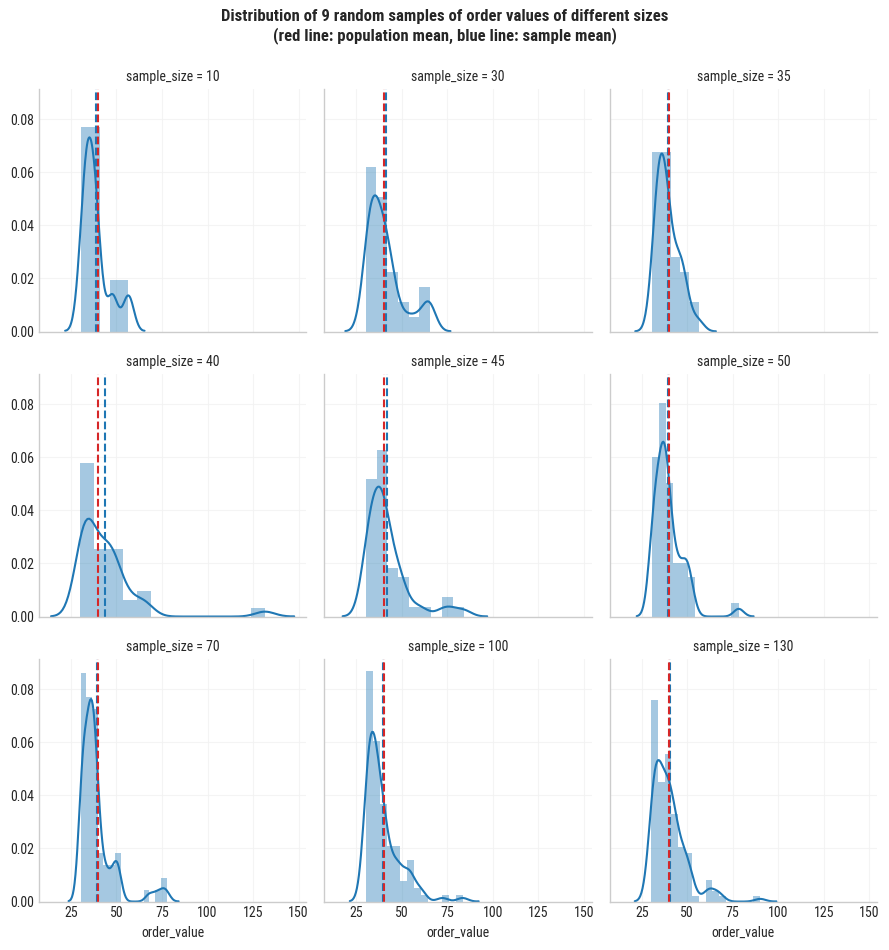

In [10]:
grid = snsexts.plots.distplot(a='order_value',
                              data=df,
                              col='sample_size',
                              col_wrap=3,
                              distplot_kws={'hist': True, 'kde': True, 'color': 'C0'})
retoucher = retouch.grid.FacetGridRetoucher(grid)

retoucher.highlight_lines(values=sample_means,
                          axis='xaxis',
                          styles_kws=[{'color': 'C0',
                                       'linestyle': 'dashed',
                                       'linewidth': 1.5,
                                       'alpha': 1}])

retoucher.highlight_lines(values=[population_mean],
                          axis='xaxis',
                          styles_kws=[{'color': 'C3',
                                       'linestyle': 'dashed',
                                       'linewidth': 1.5,
                                       'alpha': 1}])

retoucher.fig.set_title(title='Distribution of 9 random samples of order values, each of different size\n(red line: population mean, blue line: sample mean)', y=1.05)

The randomness of the samples means that sometimes even small samples will have a mean that is close to the population mean while other times it will be far off. That variance becomes smaller and smaller as the sample size increases and the sample mean converges towards the population mean.

In other words, if we picked 10 orders at random from our population, their AOV could be really close to the population mean, but equally it could be way off. The difference could vary significantly every time we repeat the process. This means that if we picked 10 orders and their AOV is £25 we have little confidence to say that most customers' AOV is £25.

But if we instead picked 100 orders at random, their AOV is much closer to the population mean. And if we repeat the process many times we're likely to get a similarly close value. In this case, if the AOV is £25 we have much more confidence in our statement that that's what our typical customer order looks like.

Smart statisticians have proven that this is true using formulas. We will use simulations later on to convince ourselves of this fact.

### Gain intuition using the interactive simulator

Below, we wrap the bits above in a function to create an interactive plot so we can vary the sample size using the slider and see how our plot changes and how similar our sample is to our population. 

**IMPORTANT**: If you are reading this notebook on Github the slider below won't work.

In [11]:
def fn(pop_dist_name,
       pop_shape_kws,
       pop_size,
       sample_size):

    dist_func = getattr(stats, pop_dist_name)
    population_fn = dist_func(**pop_shape_kws)
    population = population_fn.rvs(pop_size)
    population_mean = np.mean(population)

    sample = population_fn.rvs(sample_size)
    sample_mean = np.mean(sample)

    fig = plt.figure()

    ax = sns.distplot(a=sample, color='C0')

    ax.axvline(x=population_mean,
               color='C3',
               ls='dashed',
               label='Population mean: {0:.3f} (known)'.format(population_mean))

    ax.axvline(x=sample_mean,
               color='C0',
               label='Sample mean: {0:.3f}'.format(sample_mean), linestyle='dashed')

    fig.suptitle(t="Distribution of sample (sample size {0})".format(
        sample_size, y=1.01))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    

As we drag the slider to the right the sample size increases and the sample shape becomes more similar to that of the population. 

The *sample mean also converges towards our population mean*.

In [12]:
sample_size_slider = ipywidgets.IntSlider(
    min=10,
    max=10000,
    step=10,
    value=10,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description='Sample size: ')

out = ipywidgets.interact(fn,
                    pop_dist_name=ipywidgets.fixed(POP_DIST_NAME),
                    pop_shape_kws=ipywidgets.fixed(POP_SHAPE_KWS),
                    pop_size=ipywidgets.fixed(POP_SIZE),
                    sample_size=sample_size_slider)

interactive(children=(IntSlider(value=10, description='Sample size: ', layout=Layout(height='30px', width='500px'), max=10000, min=10, step=10), Output()), _dom_classes=('widget-interact',))

## Central Limit Theorem

Central Limit Theorem says that the sampling distribution of the sample mean (treated here as a **random variable in its own right with its own distribution**) converges to the normal distribution as the size of original sample increases, _regardless of the distribution of the original data_.

In other words, if we:

1. Draw a large number of samples from _some_ function e.g. draw a large number of order values from our population.

2. Calculate the mean (AOV) of each sample

3. Plot the distribution of the means (AOVs) (this is called the `sampling distribution of the mean`)

Then this distribution would approximate the normal distribution even though our original population distribution has an exponential shape.

And more importantly, the center of this distribution converges towards the population mean. 

### Examples

Let's look at some examples:

In [20]:
def sample_stats(pop_dist_name,
                 pop_shape_kws,
                 pop_size,
                 n_samples,
                 sample_size,
                 stat='mean',
                 ci=False,
                 confidence=95):

    fns = {
        'mean': np.mean,
        'sum': np.sum,
        'median': np.median,
        'max': np.amax,
        'min': np.amin,
        'std': np.std,
        'var': np.var
    }

    stat_func = fns[stat]

    dist_func = getattr(stats, pop_dist_name)
    population_fn = dist_func(**pop_shape_kws)
    population = population_fn.rvs(pop_size)
    population_stat = stat_func(population)

    statistics = list()

    for idx in range(n_samples):
        sample = population_fn.rvs(sample_size)
        sample_stat = stat_func(sample)
        statistics.append(sample_stat)

    if ci:
        hi = (1 + confidence / 100.0) / 2 * 100
        lo = 100 - hi

        ci_hi = np.percentile(statistics, hi)
        ci_lo = np.percentile(statistics, 100 - hi)

    mean_statistics = np.mean(statistics)

    fig = plt.figure()

    ax = sns.distplot(a=statistics, color='C0')

    ax.axvline(x=mean_statistics,
               color='C0',
               label='Mean of sample {1}s: {0:.3f}'.format(mean_statistics, stat))

    
    if stat != 'sum':
        ax.axvline(x=population_stat,
                   color='C3',
                   ls='dashed',
                   label='Population {1}: {0:.3f} (known)'.format(population_stat, stat))

    if ci:
        ax.axvline(x=ci_lo,
                   color='k',
                   linestyle='dashed',
                   label='empirical low 95% CI limit: {:.3f}'.format(ci_lo))

        ax.axvline(x=ci_hi,
                   color='k',
                   linestyle='dashed',
                   label='empirical high 95% CI limit: {:.3f}'.format(ci_hi))
        
    fig.suptitle(t="{2}s of {0} samples (of size {1} each)".format(
        n_samples, sample_size, stat), y=1.01)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    

For example, plot 50 random samples of 30 orders each

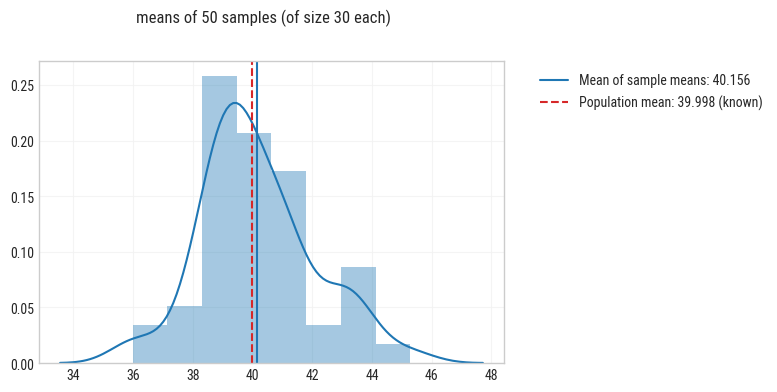

In [25]:
sample_stats(
    pop_dist_name=POP_DIST_NAME,
    pop_shape_kws=POP_SHAPE_KWS,
    pop_size=POP_SIZE,
    n_samples=50,
    sample_size=30,
    stat='mean')

Now plot 10 random samples of 10000 orders each:

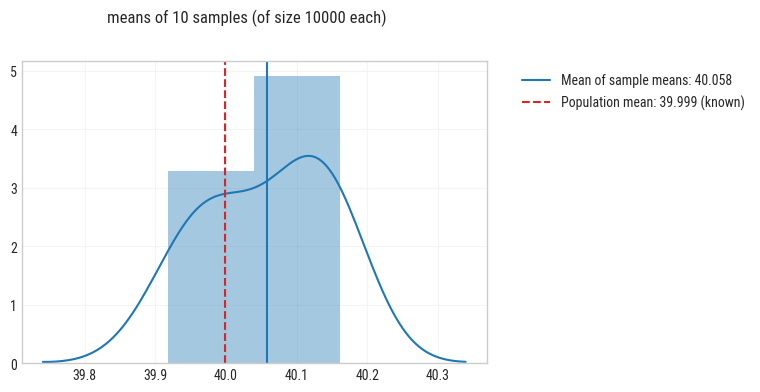

In [34]:
sample_stats(
    pop_dist_name=POP_DIST_NAME,
    pop_shape_kws=POP_SHAPE_KWS,
    pop_size=POP_SIZE,
    n_samples=10,
    sample_size=10000,
    stat='mean')

Now plot 10000 random samples of 10 orders each:

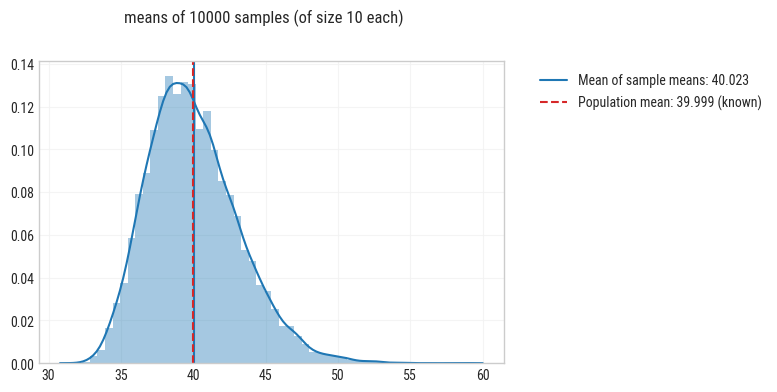

In [27]:
sample_stats(
    pop_dist_name=POP_DIST_NAME,
    pop_shape_kws=POP_SHAPE_KWS,
    pop_size=POP_SIZE,
    n_samples=10000,
    sample_size=10,
    stat='mean')

We can see that, even though we have, in both cases 100000 orders in total, generally speaking, having many samples (even if they are small, even as small as 10) converge towards the population mean in a more predictible manner than a small number of large samples.

Now plot 10000 random samples of 30 orders each:

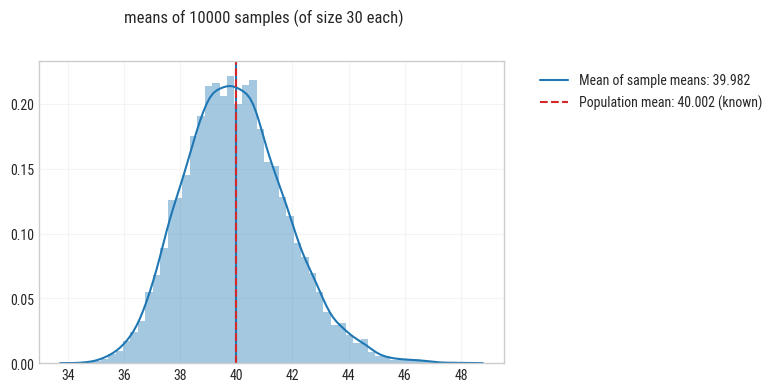

In [28]:
sample_stats(
    pop_dist_name=POP_DIST_NAME,
    pop_shape_kws=POP_SHAPE_KWS,
    pop_size=POP_SIZE,
    n_samples=10000,
    sample_size=30,
    stat='mean')

Now plot 10000 random samples of 1000 orders each:

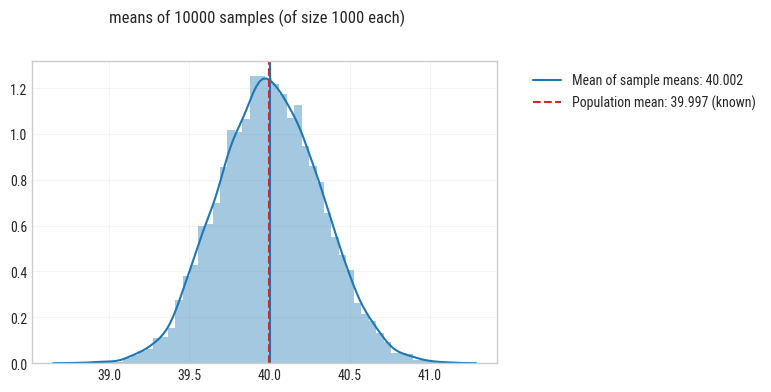

In [24]:
sample_stats(
    pop_dist_name=POP_DIST_NAME,
    pop_shape_kws=POP_SHAPE_KWS,
    pop_size=POP_SIZE,
    n_samples=10000,
    sample_size=1000,
    stat='mean')

And if we have both many, many samples, and each sample is sufficiently large, the sampling distribution is very close to the normal distribution. The mean of means is also remarkably close to the population mean.

### Scenario 1 - Many samples, each one quite small

Let's generate 1000 samples for _each_ sample size of interest e.g. if our sample size is 10 then we generate 10 order values using `population_fn`. 

Then for each `sample_size` we calculate the AOV of _each_ of our 1000 samples. And then eventually we plot the distribution of the 1000 means.

In [35]:
# number of samples to generate for each sample size
n_samples = 1000

# sample sizes of interest
sample_sizes = [10, 30, 35, 40, 45, 50, 70, 100, 130]

df = faker.utils.stacked_from_function(
    func=population_fn.rvs,
    apply_func=np.mean,
    apply_func_kws={'axis': 1},
    param_grid=dict(size=sample_sizes),
    col_names=['aov'],
    iters=n_samples)

df.rename(columns={'size': 'sample_size'}, inplace=True)

In [36]:
# Below we show the AOV of the first 5 samples, each of 10 orders
# e.g. we generated 1 sample of 10 random order values, then calculated the AOV. This is in row 0
# We then repeated the process 1000 times.
df[df['sample_size'] == 10].head()

,aov,sample_size
0,43.876100,10
1,36.951609,10
2,38.273239,10
3,41.766340,10
4,41.595310,10


Calculate the mean of all 1000 sample means for _each_ sample size and plot the results:

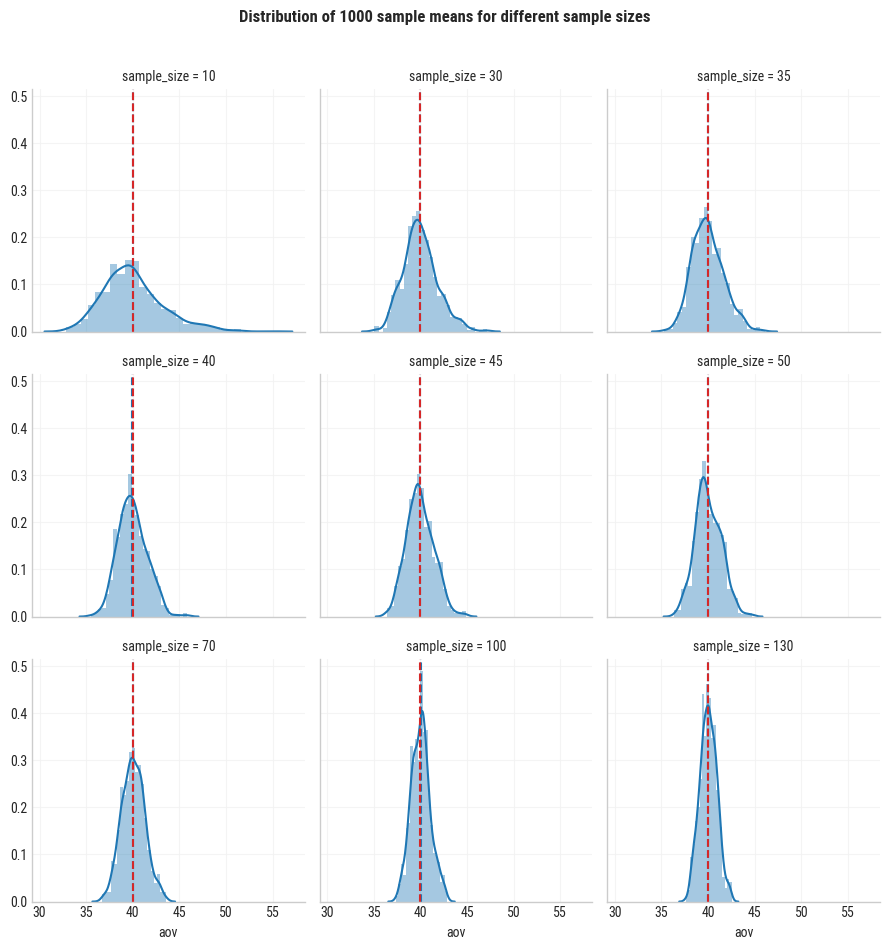

In [38]:
mean_of_aovs = df.groupby(['sample_size']).agg([np.mean]).reset_index()['aov']['mean'].values
mean_of_aovs

grid = snsexts.plots.distplot(a='aov',
                              data=df,
                              col='sample_size',
                              col_wrap=3,
                              distplot_kws={'hist': True})

retoucher = retouch.grid.FacetGridRetoucher(grid)

retoucher.highlight_lines(values=mean_of_aovs,
                          axis='xaxis',
                          styles_kws=[{'color': 'C0',
                                       'linestyle': 'dashed',
                                       'linewidth': 1.5,
                                       'alpha': 1}])

retoucher.highlight_lines(values=[population_mean],
                          axis='xaxis',
                          styles_kws=[{'color': 'C3',
                                       'linestyle': 'dashed',
                                       'linewidth': 1.5,
                                       'alpha': 1}])


retoucher.fig.set_title(title='Distribution of {} AOVs for different sample sizes\n(red line: population mean, blue line: sample mean)'.format(n_samples),
                        y=1.05)

We can see that: 

1. The distribution of means converges to the normal distribution 

2. The mean of means converges towards the population mean 

The above holds true if **we collect lots of samples, regardless of sample size** (although the higher the sample size, the more normal the distribution of means looks like).

Crucially, if the distribution of means resembles the normal distribution, we can use the theoretical properties of the normal distribution and in particular the fact that 95% of the distribution lies between the 2.5th and 97.5th percentiles.

So __if__ we had the ability to draw many many samples (even small ones) from an unknown population, calculated their means and plotted their distribution, we would know that if we repeated the process 100 times, 95 times out of a hundred our true population mean would lie between the 2.5th and 97.5th percentiles of this sampling distribution __if this sampling distribution is approximately normal__.

### Scenario 2 - Few samples, each one quite large

Now let's do the same but generate a small number of samples, where each sample size is much greater

In [39]:
# number of samples to generate for each sample size
n_samples = 10

# sample sizes of interest
sample_sizes = [1000, 3000, 3500, 4000, 4500, 5000, 7000, 10000, 13000]

df = faker.utils.stacked_from_function(
    func=population_fn.rvs,
    apply_func=np.mean,
    apply_func_kws={'axis': 1},
    param_grid=dict(size=sample_sizes),
    col_names=['aov'],
    iters=n_samples)

df.rename(columns={'size': 'sample_size'}, inplace=True)

Calculate the mean of all 10 sample means for _each_ sample size and plot the results:

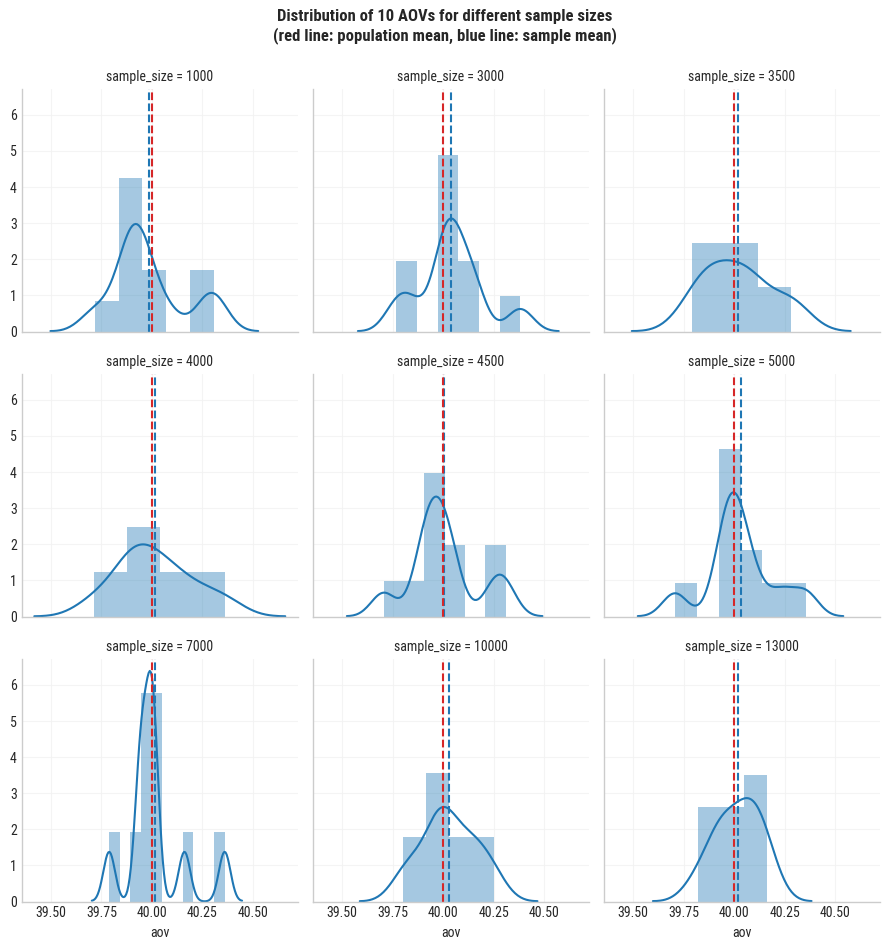

In [40]:
mean_of_aovs = df.groupby(['sample_size']).agg([np.mean]).reset_index()['aov']['mean'].values
mean_of_aovs

grid = snsexts.plots.distplot(a='aov',
                              data=df,
                              col='sample_size',
                              col_wrap=3,
                              distplot_kws={'hist': True})

retoucher = retouch.grid.FacetGridRetoucher(grid)

retoucher.highlight_lines(values=mean_of_aovs,
                          axis='xaxis',
                          styles_kws=[{'color': 'C0',
                                       'linestyle': 'dashed',
                                       'linewidth': 1.5,
                                       'alpha': 1}])

retoucher.highlight_lines(values=[population_mean],
                          axis='xaxis',
                          styles_kws=[{'color': 'C3',
                                       'linestyle': 'dashed',
                                       'linewidth': 1.5,
                                       'alpha': 1}])


retoucher.fig.set_title(title='Distribution of {} AOVs for different sample sizes\n(red line: population mean, blue line: sample mean)'.format(n_samples),
                        y=1.05)

We can see that unlike Scenario 1 where we had many samples, the sampling diatribution when we have a handful but large samples is all over the place and the mean of means doesn't converge towards the population mean as well as in Scenario 1.

And the final example, plot the sampling distribution of the mean for 15000 samples of size 100 each (so many samples, each reasonably large):

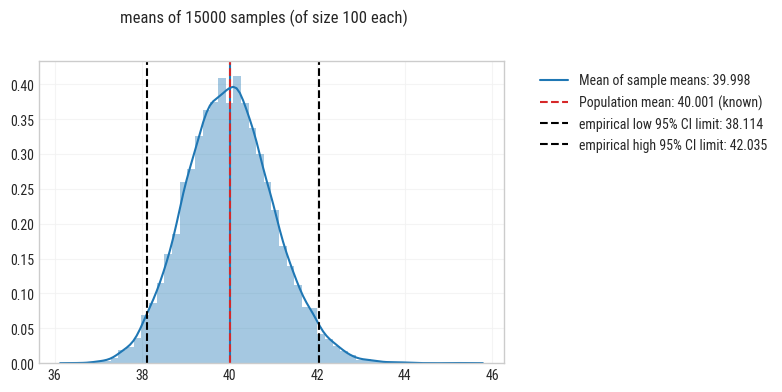

In [42]:
sample_stats(
    pop_dist_name=POP_DIST_NAME,
    pop_shape_kws=POP_SHAPE_KWS,
    pop_size=POP_SIZE,
    n_samples=15000,
    sample_size=100,
    ci=True,
    confidence=95,
    stat='mean')

### Gain intuition using the interactive simulator

Now let's use a simulator to gain some intuition.

**IMPORTANT**: If you are reading this notebook on Github the slider below won't work. 

In [ ]:
sample_size_slider = ipywidgets.IntSlider(
    min=10,
    max=1000,
    step=10,
    value=15,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description='Sample size:')

n_samples_slider = ipywidgets.IntSlider(
    min=10,
    max=10000,
    step=10,
    value=500,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description='N samples:')

confidence_slider = ipywidgets.IntSlider(
    min=0,
    max=100,
    step=1,
    value=95,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description='Confidence:')

stat_options = ipywidgets.Dropdown(
    options=['mean', 'median', 'sum', 'max', 'min', 'std', 'var'],
    description='Statistic:')

out = ipywidgets.interact(sample_stats,
                    pop_dist_name=ipywidgets.fixed(POP_DIST_NAME),
                    pop_shape_kws=ipywidgets.fixed(POP_SHAPE_KWS),
                    pop_size=ipywidgets.fixed(POP_SIZE),
                    n_samples=n_samples_slider,
                    sample_size=sample_size_slider,
                    stat=stat_options,
                    confidence=confidence_slider,
                    ci=True)

## The bootstrap in a nutshell

So what is the bootstrap? In a nutshell, if we have a __large enough sample__, we can:
    
1. __Treat our sample as if it were the population__ (smart people have proven that this is a valid assumption if the sample is large) e.g. if we have 10000 orders, we treat this sample as if it were our population.

2. Draw a large number of samples from it __as if we were drawing them from the population__. Unlike before where we used `population_fn` to generate fresh samples, in the bootstrap we randomly _resample with replacement_ from our 10000 orders, like picking raffle tickets from a hat and then putting them back in the hat.

3. For each drawn sample, calculate their means and plot the distribution of the means (this is called the `bootstrap distribution`). 

4. Use the bootstrap distribution to calculate a confidence interval around the mean. Around 95% of the time this CI will contain the *true population mean*.

The bootstrap is awesome because:

1. It can be used with a wide variety of statistics not just the mean but also median, trimmed mean, etc (classical statistical methods like ttest only work for the mean -- using it with the trimmed mean violates its assumptions).

2. It makes **no assumptions** about the underlying distribution of the data. 

People who code love the bootstrap because you can pass a different statistic (mean, median etc) on the fly without coding in silly exceptions for different kinds of data. This means that you can productionise the measurement of experiments.

However, the __bootstrap fails _if_ the sample is not large enough to begin with__. If it's not large enough then it's less likely that it will be representative of the population to begin with. The process of bootstrapping will still work but the confidence interval that it produces may easily miss the true population mean entirely.

## How to run a basic bootstrap and calculate confidence interval

### How does resampling with replacement work?

Resampling with replacement is core to understanding the bootstrap. So let's look at some examples:

Let's generate some fake data, an array of 10 values:

In [43]:
data = np.array([4, 4, 5, 4, 2, 2, 19, 10, 3, 4, 3, 10, 27, 5, 2, 2, 5, 2, 4, 10])
data_size = data.shape[0]
print("number of values in data: {}".format(data_size))
print("mean of data: {}".format(np.mean(data)))

number of values in data: 20
mean of data: 6.35


When we randomly draw a number from it, each of the 20 values has an equal probability of being drawn, `1/20` more precisely.

However, as some of the values occur more than once -- like `2` which appears several times -- , the probability of drawing a 2 is much greater than the probability of drawing a 3 (which occurs only once).

Try drawing a random number by running the cell below several times:

In [44]:
one_value = np.random.choice(data, size=1)
one_value

array([19])

If we do this 10 times, we might get these kinds of values:

In [46]:
for i in range(10):
    print(np.random.choice(data, size=1))

[10]
[10]
[10]
[5]
[5]
[2]
[4]
[2]
[2]
[2]


In resampling with replacement we draw a sample of **the same size** from the original data, but **with replacement**. 

This means that we draw a sample of 20 from our original sample of 20. And each time we draw a value, it might:

* be drawn more than once

* not be drawn at all

Run the cell below several times to get random resamples of the data. 

Notice that we get 20 values back and some values may occur more than others while some of the original values may occur at all.

In [47]:
resample = np.random.choice(data, size=data_size, replace=True)
resample

array([ 4,  2,  2, 10,  2,  4, 19, 10,  2, 10,  4,  5, 19,  4,  3,  4, 27,
       10,  5,  2])

Let's draw 10 resamples:

In [48]:
for i in range(10):
    resample = np.random.choice(data, size=data_size, replace=True)
    print("\nresample: {},\nmean: {}".format(resample, np.mean(resample)))
    
    
print("\nmean of original data: {}".format(np.mean(data)))


resample: [10 10  4  3  4  3 10 10  5  4  2  5  2  5  3  3  2 27  3  5],
mean: 6.0

resample: [ 4  2  5  2  2 10 10  5 19  3  4  2  5  4  4 10 10  2  2 27],
mean: 6.6

resample: [ 4 10 19  4 10  4  5  2  3 10  4  2  2  2  4  5 27  2 10 10],
mean: 6.95

resample: [ 4  2 19 10 10  3 10 19  2  2 10  2  4  2  2 19 19  4 27  4],
mean: 8.7

resample: [ 2  2  4  5  4 10 27 27  4  2  4  4 19 27  5  2  4 10 10 10],
mean: 9.1

resample: [10 19  5  5  4  2  2  4  4  4  2  4  4  4  4  4  4  3 27  4],
mean: 5.95

resample: [ 2  3 27  4  5 27  5  4  3  2  4  4  2  4  4 10  4  2  3  2],
mean: 6.05

resample: [ 2 10  2  3  2  2 19  4 10  3  2  2  3  4  2  4 10 10  2  2],
mean: 4.9

resample: [ 3  5  3  4 27  2  4  4 10  2  5  3 19  2  5 10  4 19 27  3],
mean: 8.05

resample: [ 4 10 10  2  5  4 27 10 19 10  2  4 10  2  2  5 10  2  4  4],
mean: 7.3

mean of original data: 6.35


We can can see above that the means of the 10 resamples are not too far off from the mean of our original data from which we resampled. This is the core principle behind the bootstrap at work. 

What if we re-run the process many more times, about 10000 times.

### The bootstrap at work

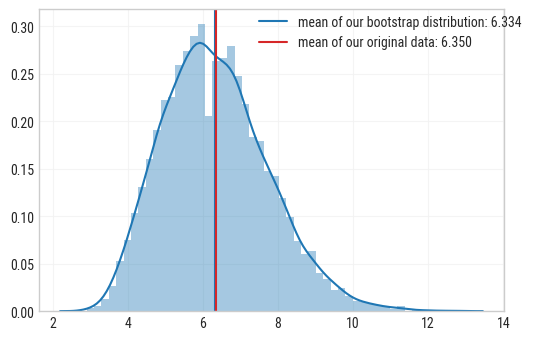

In [50]:
means = list()
for i in range(10000):
    resample = np.random.choice(data, size=data_size, replace=True)
    means.append(np.mean(resample))

ax = sns.distplot(a=means)
ax.axvline(x=np.mean(means), color='C0', label='mean of our bootstrap distribution: {:.3f}'.format(np.mean(means)))
ax.axvline(x=np.mean(data), color='C3', label='mean of our original data: {:.3f}'.format(np.mean(data)))
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.0)


If we: 
    
1. Resample with replacement from our data which holds 20 values (so very small sample),
2. Calculate the mean of each sample
3. Plot the distribution of these means
4. Draw a line for the mean of means (blue) -- this is the `mean of the bootstrap distribution`.
5. Draw a line for the mean of our original data

We can see that the mean of the bootstrap distribution converges to the mean of our original data. We can also see that it's mostly normal looking.

As long as the original data is _large enough to be representative of the population_ we can use the theoretical properties of the normal distribution to estimate the population mean.

### Why the bootstrap works

* The **less common a value is in the original data**, the *less likely it is that it will get picked during resampling*. Even if it does get picked and they influence the mean of the resample, it will likely affect a small number of resamples which will have little effect over the resulting bootstrap distribution of the means (and ultimately that is the distribution we care about, _not_ individual resamples).

* The **more common a value is in the original data**, the *more likely it is that it will get picked during resampling*. Therefore the means of bootstrap distribution will reflect the values which occur most frequently, and therefore be more representative of the center of the original sample which in turn is likely to be representative of the population where that value was drawn from.

### Putting it all together

Now, let's return to our population of order values. Remember that the population AOV is **known**.

Let's generate a random sample of size n using `population_fn`. Then, we apply the bootstrap method.

In [78]:
def bootstrap(pop_dist_name,
              pop_shape_kws,
              pop_size,
              n_resamples,
              original_sample_size,
              confidence=95,
              stat='mean',
              plot=True):

    fns = {
        'mean': np.mean,
        'sum': np.sum,
        'median': np.median,
        'max': np.amax,
        'min': np.amin,
        'std': np.std,
        'var': np.var
    }

    stat_func = fns[stat]

    dist_func = getattr(stats, pop_dist_name)
    population_fn = dist_func(**pop_shape_kws)
    population = population_fn.rvs(pop_size)

    population_stat = stat_func(population)

    # draw one single sample from the population
    # which we will then treat as if it were the population
    # and from which we will draw resamples
    original_sample = population_fn.rvs(original_sample_size)

    # the statistic of the original sample (e.g. mean/median)
    original_sample_stat = stat_func(original_sample)

    # plot distribution of original sample
    if plot:
        fig = plt.figure()
        ax = sns.distplot(a=original_sample)

        if stat != 'sum':

            ax.axvline(x=population_stat,
                       color='C0',
                       ls='dashed',
                       label='Population {1}: {0:.3f} (known)'.format(population_stat, stat))

        ax.axvline(x=original_sample_stat,
                   color='C3',
                   ls='dashed',
                   label="{} of original sample: {:.3f}".format(stat, original_sample_stat))

        fig.suptitle(t="Distribution of original sample (sample size {0})\nBootstrap treats this as if it were the population".format(
            original_sample_size,
            y=1.01))

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    statistics = list()
    for idx in range(n_resamples):
        # we draw a resample with replacement from the original sample we drew from the population
        resample = np.random.choice(original_sample,
                                    size=original_sample_size,
                                    replace=True)

        # calculate the mean (or some other statistic)
        resample_stat = stat_func(resample)

        # save it later
        statistics.append(resample_stat)

    # calculate the center of the bootstrap distribution of all resample means (or some other statistic)
    mean_statistics = np.mean(statistics)

    # calculate confidence interval around the mean
    # for 95% confidence 95% of the time this will include the true population mean
    hi = (1 + confidence / 100.0) / 2 * 100
    lo = 100 - hi

    ci_hi = np.percentile(statistics, hi)
    ci_lo = np.percentile(statistics, 100 - hi)

    if plot:
        fig = plt.figure()

        ax = sns.distplot(a=statistics, color='C0')

        if stat != 'sum':
            ax.axvline(x=population_stat,
                       color='C3',
                       ls='dashed',
                       label='Population {1}: {0:.3f} (known)'.format(population_stat, stat))

        ax.axvline(x=mean_statistics,
                   color='C0',
                   label='Mean of resample {1}s: {0:.3f}'.format(mean_statistics, stat))

        ax.axvline(x=original_sample_stat, color='C1',
                   label='Original sample {1}: {0:.3f}'.format(original_sample_stat, stat))

        ax.axvline(x=ci_lo,
                   color='k',
                   linestyle='dashed',
                   label='bootstrap low {}% CI limit: {:.3f} (percentile method)'.format(confidence, ci_lo))

        ax.axvline(x=ci_hi,
                   color='k',
                   linestyle='dashed',
                   label='bootstrap high {}% CI limit: {:.3f} (percentile method)'.format(confidence, ci_hi))

        fig.suptitle(t="{2}s of {0} resamples (drawn from original sample size {1})".format(
            n_resamples, original_sample_size, stat),
            y=1.01)

        fig.text(s="{3}% confidence interval around original sample {2}: ({0:.3f}, {1:.3f})".format(ci_lo, ci_hi,
                                                                                                    stat,
                                                                                                    confidence),
                 verticalalignment='center',
                 horizontalalignment='center',
                 color='black',
                 x=0.5,
                 y=0,
                 wrap=True)

        plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

    return {
        'population_stat': population_stat,
        'boot_ci': (ci_lo, ci_hi)
    }

We generate a sample of size 50 from `population_fn` and then treat it as if it were the population during the bootstrap method.

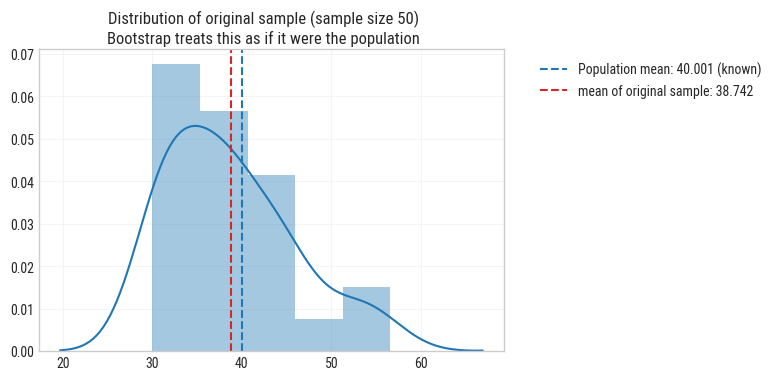

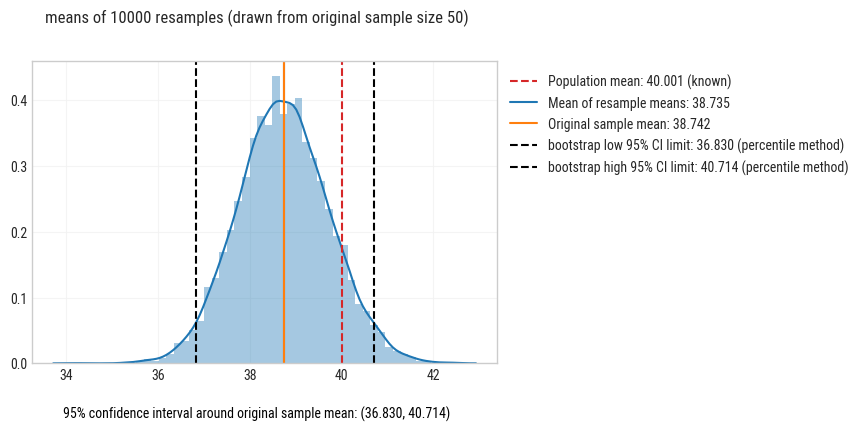

In [79]:
out = bootstrap(pop_dist_name=POP_DIST_NAME,
                pop_shape_kws=POP_SHAPE_KWS,
                pop_size=POP_SIZE,
                n_resamples=10000,
                original_sample_size=50,
                confidence=95,
                stat='mean')

If we run the above cell several times, we will see that sometimes the population AOV (the red dashed line) falls between the bootstrap confidence interval (the black dashed lines). At other times, the bootstrap confidence interval might miss the true population AOV. We typically use these boundaries to estimate where the population mean might be.

Let's repeat the process for a larger original sample size, say 1000:

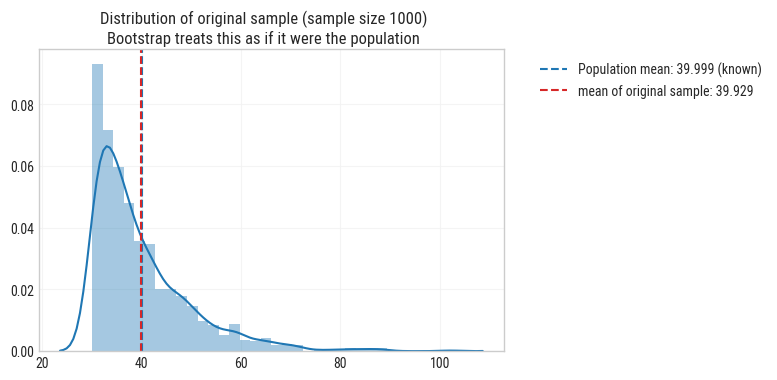

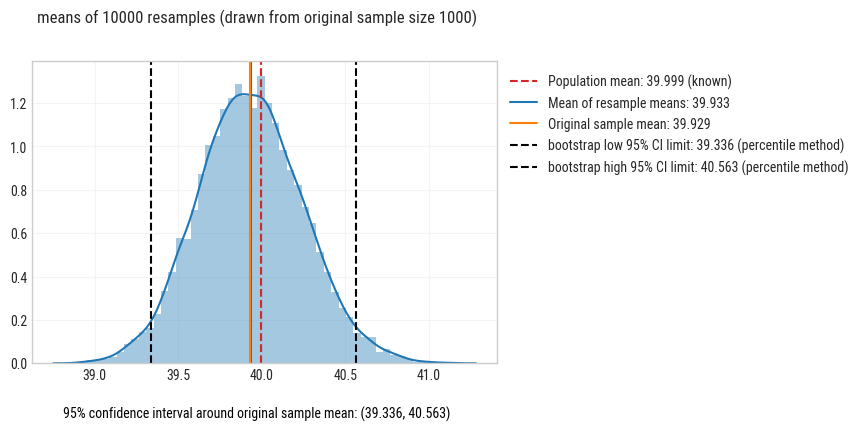

In [81]:
out = bootstrap(pop_dist_name=POP_DIST_NAME,
                pop_shape_kws=POP_SHAPE_KWS,
                pop_size=POP_SIZE,
                n_resamples=10000,
                original_sample_size=1000,
                confidence=95,
                stat='mean')

We can see that the center of the bootstrap distribution is much closer to the true population mean for an original sample size of 1000 than one of 50.

### Gain intuition using the interactive simulator

**IMPORTANT**: If you are reading this notebook on Github the slider below won't work

Below we can see that the more resamples we draw, the more the mean of the bootstrap distribution will converge towards the `mean of the original sample`. 

However, even with a very large original sample size, the bootstrap distribution **does not necessarily center at the population mean**. 

If the original sample is large enough and the bootstrap distribution is approx normal, then we can say that the true population mean lies somewhere between the 2.5th and 97.5th percentiles in this distribution.

In [104]:
original_sample_size_slider = ipywidgets.IntSlider(
    min=10,
    max=10000,
    step=10,
    value=10,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description="Sample size:")

n_resamples_slider = ipywidgets.IntSlider(
    min=10,
    max=15000,
    step=10,
    value=1000,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description="N resamples:")

confidence_slider = ipywidgets.IntSlider(
    min=0,
    max=100,
    step=1,
    value=95,
    layout=ipywidgets.Layout(width='500px', height='30px'),
    description='Confidence:')


stat_options = ipywidgets.Dropdown(
    options=['mean', 'median', 'sum', 'max', 'min', 'std', 'var'],
    description='Statistic:')

out = ipywidgets.interact(bootstrap,
                          pop_dist_name=ipywidgets.fixed(POP_DIST_NAME),
                          pop_shape_kws=ipywidgets.fixed(POP_SHAPE_KWS),
                          pop_size=ipywidgets.fixed(POP_SIZE),
                          n_resamples=n_resamples_slider,
                          original_sample_size=original_sample_size_slider,
                          confidence=confidence_slider,
                          stat=stat_options,
                          plot=ipywidgets.fixed(True))

interactive(children=(IntSlider(value=1000, description='N resamples:', layout=Layout(height='30px', width='500px'), max=15000, min=10, step=10), IntSlider(value=10, description='Sample size:', layout=Layout(height='30px', width='500px'), max=10000, min=10, step=10), IntSlider(value=95, description='Confidence:', layout=Layout(height='30px', width='500px')), Dropdown(description='Statistic:', options=('mean', 'median', 'sum', 'max', 'min', 'std', 'var'), value='mean'), Output()), _dom_classes=('widget-interact',))

### Bootstrap accuracy

One of the key questions we want to ask is how often does the bootstrap fail? In other words, how often does the bootstrap confidence interval fail to contain the true population mean? The answer varies by the size of the original sample (if this is too small, it's less likely to be representative of the population). We therefore expect at smaller sample sizes the bootstrap to fail more often. 

The question is:

1. How small is _too_ small a sample size for the bootstrap to work?
2. What's the _smallest sample size_ we can use in order for us to have confidence in the results?

We answer both of these questions using simulations. Let's look at some examples below:

Let's define our simulation function:

In [105]:
def bootstrap_accuracy(n_iters,
                       n_resamples,
                       original_sample_size,
                       confidence,
                       stat,
                       plot):
    """
    Run the bootstrap n_iters time and assess how many times the bootstrap CI contains the population mean
    """
    assess = list()
    for i in range(n_iters):
        out = bootstrap(pop_dist_name=POP_DIST_NAME,
                        pop_shape_kws=POP_SHAPE_KWS,
                        pop_size=POP_SIZE,
                        n_resamples=n_resamples,
                        original_sample_size=original_sample_size,
                        confidence=confidence,
                        stat=stat,
                        plot=plot)
        #print("out: ", out, "iteration: ", i)
        if out['boot_ci'][0] <= out['population_stat'] <= out['boot_ci'][1]:
            # boot CI contains population mean
            assess.append(1)
        else:
            # boot CI does not contain population mean
            assess.append(0)

    assess = np.array(assess)

    contains = assess.sum() / assess.shape[0]
    print("Ran the bootstrap method using {} resamples on an original sample size of {}. Out of {} iterations, {:.1%} bootstrap {}% confidence intervals contain the true population mean.".format(
        n_resamples,
        original_sample_size,
        n_iters,
        contains,
        confidence))

Let's run the bootstrap 100 times and see how often the 95% bootstrap confidence interval fails to contain the population mean for an original sample size of 50.

In [106]:
bootstrap_accuracy(n_iters=100,
                   n_resamples=10000,
                   original_sample_size=50,
                   confidence=95,
                   stat='mean',
                   plot=False)

Ran the bootstrap method using 10000 resamples on an original sample size of 50. Out of 100 iterations, 89.0% bootstrap 95% confidence intervals contain the true population mean.


Let's repeat our accuracy assessment but this time for a sample size of 1000:

In [107]:
bootstrap_accuracy(n_iters=100,
                   n_resamples=10000,
                   original_sample_size=1000,
                   confidence=95,
                   stat='mean',
                   plot=False)

Ran the bootstrap method using 10000 resamples on an original sample size of 1000. Out of 100 iterations, 94.0% bootstrap 95% confidence intervals contain the true population mean.


# Intuition behind the bootstrap for proportions

TODO